In [1]:
with open('spacex.txt') as f :
    space_text = f.read()

In [2]:
import re 

# remove the punctuation 
what_to_remove = '(|\|/|[d+])'
space_text = re.sub(what_to_remove , '' , space_text)

#to remove character sequence that looks like this [12], [1] <- WIKI CITATION CHAR SEQUENCES
# \[\d+\]

# split at the white space or - or comma \s -> whitespace 
pattern = '\s|,|-'
after_removal = re.split(pattern,space_text)

In [15]:
#make them all lower case 
after_removal_lower = [word.lower() for word in after_removal ]

after_removal_lower_str = ' '.join(after_removal_lower)


# findall function wants a string not a list so i had to change in a line above 
# i want just words that are >=4 letters 
what_i_want = r'[a-z]{4,}'
my_new_spacex = re.findall(what_i_want,after_removal_lower_str)
after_removal_lower

['space',
 'exploration',
 'technologies',
 'corp.',
 '',
 't/a',
 'spacex',
 '',
 'is',
 'an',
 'american',
 'aerospace',
 'manufacturer',
 'an',
 'space',
 'transportation',
 'services',
 'company',
 'heaquartere',
 'in',
 'hawthorne',
 '',
 'california.',
 'it',
 'was',
 'foune',
 'in',
 '2002',
 'by',
 'elon',
 'musk',
 'with',
 'the',
 'goal',
 'of',
 'reucing',
 'space',
 'transportation',
 'costs',
 'to',
 'enable',
 'the',
 'colonization',
 'of',
 'mars.[9][10][11]',
 'spacex',
 'has',
 'evelope',
 'several',
 'launch',
 'vehicles',
 '',
 'the',
 'starlink',
 'satellite',
 'constellation',
 '',
 'the',
 'dragon',
 'cargo',
 'spacecraft',
 '',
 'an',
 'flown',
 'humans',
 'to',
 'the',
 'international',
 'space',
 'station',
 'on',
 'the',
 'crew',
 'dragon',
 'demo',
 '2.',
 '',
 "spacex's",
 'achievements',
 'inclue',
 'the',
 'first',
 'privately',
 'fune',
 'liqui',
 'propellant',
 'rocket',
 'to',
 'reach',
 'orbit',
 '(falcon',
 '1',
 'in',
 '2008)',
 '[12]',
 'the',
 'fir

In [12]:
my_new_spacex

# finding unique words in my_new_spacex using numpy   
# and upacking them into 2 variables uWords and count

import numpy as np 
uWords,count = np.unique(my_new_spacex,return_counts = True)

# having a look at my words and count using for-loop
for word,freq in zip(uWords,count):
    print(f'{word} : {freq}')
    if word == 'access': #-> shortening the print output 
        break
      

ablatively : 1
able : 2
aboar : 3
abort : 1
about : 6
acceleration : 1
accepte : 1
access : 2
<class 'numpy.ndarray'>


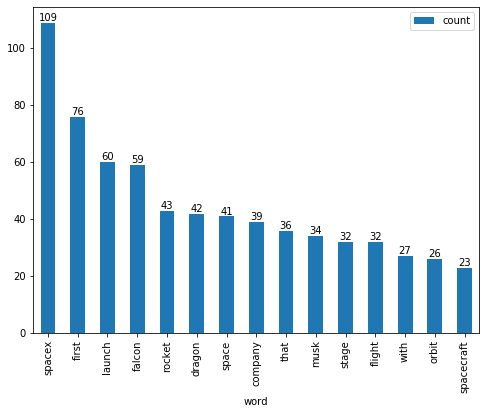

In [5]:
import pandas as pd

# making a DataFrame from my two numpy arrays 
data = pd.DataFrame(count,uWords)

data.columns = ['count']

data.index.name ='word'
data.sort_values('count',ascending = False,inplace = True)



top15 = data[:15]
top15
axes = top15.plot(kind = 'bar', figsize =(8,6))

# annotate the bars in the axes 
for patch in axes.patches:
    axes.annotate(str(patch.get_height()),
                 ((patch.get_x()+patch.get_width()/2),patch.get_height()),
                 ha= 'center',va='bottom')